In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
# Step 2: Load the Dataset
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['PRICE'] = housing.target  # Adding the target variable

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Step 3: Preprocessing
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [7]:
# Step 4: Split into Features and Target
X = data.drop('PRICE', axis=1)  # Independent variables
y = data['PRICE']               # Dependent variable (house prices)

In [8]:
# Step 5: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Step 7: Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [11]:
# Step 8: Model Evaluation
# Calculate MSE and RMSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [15]:
# Calculate R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(r2_train)
print(r2_test)

0.6125511913966952
0.5757877060324511


In [16]:
# Print Evaluation Metrics
print("\nModel Evaluation Metrics:")
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)


Model Evaluation Metrics:
Training MSE: 0.5179331255246699
Testing MSE: 0.555891598695244
Training RMSE: 0.7196757085831575
Testing RMSE: 0.7455813830127761
Training R^2: 0.6125511913966952
Testing R^2: 0.5757877060324511


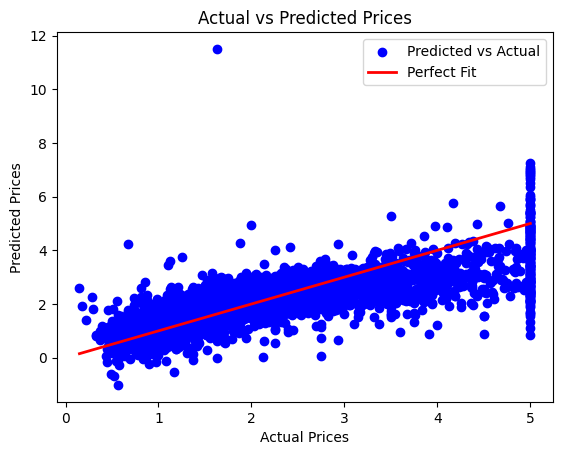

In [17]:
# Step 9: Visualization
plt.scatter(y_test, y_test_pred, color="blue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()